This is Sprint 1 deliverable preared by Aidos Askhatuly on March 7th, 2023.

In [ ]:
import pandas as pd

In [19]:
network_df = pd.read_csv("C:/Users/askha/OneDrive/Desktop/BrainStation/Capstone/DDos_attack_detection/datasets/final-dataset.csv")

In [20]:
network_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,-------,9,4901,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,Normal


### Dataset

The dataset is coming from the open source network analyzing software `"Wireshark"`. The dataset contains information about `network packets` travelling between client, server and network devices in between such as routers and swithces. `"Network packet"` or `"packet"` is a unit of data that is transmitted over a network. It's the basic unit of communication in network protocols such as the Internet Protocol. A packet typically consists of two main parts: `the header` and `the payload`. `The header` contains control information such as the source and destination addresses, protocol information, packet sequence number, and error detection codes. `The payload` contains the actual data being transmitted. The dataset does not contain information about header and payload due to privacy. 

The dataset also contains information about whether the network packets have been `normal` or `non-normal`, i.e. used to perform network attack.

### Data Dictionary

To help us with our analysis, let's take a look at the data dictionary below.

#### Packet source and destination information
- SRC_ADD (numeric). Source (client) IP address. Due to sensitivty, IP address has been encrypted.
- DES_ADD (numeric). Destination (server) IP address. Due to sensitivty, IP address is encrypted
- FROM_NODE (numeric). Identifier (IP) for the source node in the network. This is the source node for the packets under consideration. The source nodes are clients, servers, switchs and routers depending on where the current packets have originated from.
- TO_NODE (numeric). Identifier (IP) for the destination node in the network. This is the destination node for the packets under consideration. The destination nodes are clients, servers, switches and routers depending on which device will receive the packets.
- NODE_NAME_FROM (object). Same as FROM_NODE but identifier is a hostname.
- NODE_NAME_TO (object). Same as TO_NODE but identifier is a hostname.


#### Packet time information
Wireshark provides a packet time information in numeric format. 
- PKT_IN (numeric). Time packet sent from the specific node.
- PKT_OUT (numeric). Time packet received by the specific node.
- PKT_R (numeric). `Unknown field.`
- PKT_DELAY_NODE (numeric). The delay experienced by packets at a specific node in the network.
- PKT_DELAY (numeric). Total packet travel time from source to destination. It's different from PKT_DELAY_NODE in a way that it captures the total packet travel time from source to destination node including everything in between like switches and routers.
- PKT_SEND_TIME (numeric). The timestamp indicating the time when a packet was sent from the source node or device.
- PKT_RESEVED_TIME (numeric). The timestamp indicating the time when a packet was received at the destination node or device.
- FIRST_PKT_SENT (numeric). The timestamp indicating a time when the first packet in a network communication session was sent from the source node.
- LAST_PKT_RESEVED (numeric). The timestamp indicating the time when the last packet in a network communication session was received at the destination node or device.

#### Packet size information

- PKT_SIZE (numeric). Size of the network packet in bytes.
- NUMBER_OF_BYTE (numeric). The total number of bytes transmitted within a flow or connection.
- PKT_AVG_SIZE (numeric). The average amount of data (in bytes) contained in each packet exchanged between network nodes. 

#### All other information about packet and network.
- PKT_ID (numeric). Unique identifier for each network packet.
- PKT_TYPE (object). Common packet types: 

a. TCP (Transmission Control Protocol). TCP is a connection-oriented protocol used for reliable and ordered data transmission. 

b. UDP (User Datagram Protocol). UDP is a connectionless protocol used for fast and lightweight data transmission.

c. ICMP (Internet Control Message Protocol). ICMP is a network-layer protocol used for error reporting and diagnostics. Common packet types associated with ICMP include:
Echo request and reply that are used for ping tests to check network connectivity.
- FLAGS (object). TCP flags or control bits associated with a TCP packet. TCP uses a set of control flags to indicate various aspects of packet behavior, such as the SYN (synchronize), ACK (acknowledge), FIN (finish), RST (reset), and others
- FID (numeric). Flow Identifier. A unique identifier associated with a flow of network traffic. A flow is a unidirectional sequence of packets between a specific source and destination, typically identified by their IP addresses and port numbers.
- SEQ_NUMBER (numeric). Sequence Number. Sequence number of a TCP packet within a TCP connection. TCP uses sequence numbers to ensure the ordered delivery of data segments and to detect and recover from packet loss or reordering.
- NUMBER_OF_PKT (numeric). Number of Packets. The total number of packets transmitted within a flow or connection.
- PKT_RATE (numeric). Packet transmission rate. Packet transmission rate, measured in packets per second (pps) or packets per unit time.
- BYTE_RATE (numeric). The rate at which bytes are transmitted or received over the network within a specific time interval. Expressed in bytes per second (B/s). 
- UTILIZATION (numeric). Utilization of a network link or resource. The degree to which the network link or resource is being used, expressed as a percentage.

#### Field of interest
- PKT_CLASS. Packet class. Target value indicating class of the packet.

#### Question of interest

How to identify malicious traffic that intends to disrupt the normal operation of a network, service, or website. The goal of network attack is to overwhelm the target with a flood of traffic, making it inaccessible to legitimate users.

#### Plan of Attack:
1. Identifying potential candidates for data cleaning (looking for missing data, duplicate data, other anomalies)
2. Identifying potential candidates for data preprocessing (is everything in the right format?)
3. Exploratory analysis (looking at the variables)
4. Draw insights
5. Formulate a conclusion / recommendation

### Exploring dataset to identify unclean data

Wireshark has provided us with this snapshot of network traffic. First, let's read in the data and take a look at what we're working with, and assess the level of cleaning and preprocessing that needs to be done.

In [21]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Let's read in the data
network_df = pd.read_csv("C:/Users/askha/OneDrive/Desktop/BrainStation/Capstone/DDos_attack_detection/datasets/final-dataset.csv")

Having read in the data, let's take a look:

In [79]:
# Check
network_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,-------,9,4901,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,Normal


Data was read correctly read.

In [80]:
# How much data are we working with here?
print(network_df.shape)

(2160668, 28)


In [81]:
print(f'Our dataframe has {network_df.shape[0]} rows and {network_df.shape[1]} columns.')

Our dataframe has 2160668 rows and 28 columns.


We have `2 160 668` rows of `28` different variables that were provided. However, possibly some concern as there does not appear to be a unique packet identifier, `PKT_ID` has duplicates since one packet travels accross network devices (nodes) to get to the destination. We will proceed with caution, and check for duplicates in the data and so on.

Next steps:

- Check datatypes and formats
- Check for duplicate data (is the data unique on the row-level? What is the row-level?)
- Check for missing data

#### Step 1: Check datatypes and formats

First we will investigate the structure and format of the data to make sure that nothing is missed.

In [82]:
network_df.head(4)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal


We see a variety of numerical (int/float) and non-numeric columns. Furthermore:

In [83]:
network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NUMBER_OF_BYTE    int64  
 12  NODE_NAME_FROM    object 
 13  NODE_NAME_TO      object 
 14  PKT_IN            float64
 15  PKT_OUT           float64
 16  PKT_R             float64
 17  PKT_DELAY_NODE    float64
 18  PKT_RATE          float64
 19  BYTE_RATE         float64
 20  PKT_AVG_SIZE      float64
 21  UTILIZATION       float64
 22  PKT_DELAY         float64
 23  PKT_SEND_TIME     float64
 24  PKT_RESEVED_TIME  float64
 25  FIRST_PKT_SENT    float64
 26  LAST_PKT_RESEV

In [84]:
# Count the number of null or empty values in each column
null_columns = network_df.isnull().sum()  # Count null values in each column
empty_columns = (network_df == '').sum()  # Count empty values in each column

# Total number of null or empty values in each column
total_null_empty_columns = null_columns + empty_columns

print("Number of null or empty columns:")
print(total_null_empty_columns)

Number of null or empty columns:
SRC_ADD             0
DES_ADD             0
PKT_ID              0
FROM_NODE           0
TO_NODE             0
PKT_TYPE            0
PKT_SIZE            0
FLAGS               0
FID                 0
SEQ_NUMBER          0
NUMBER_OF_PKT       0
NUMBER_OF_BYTE      0
NODE_NAME_FROM      0
NODE_NAME_TO        0
PKT_IN              0
PKT_OUT             0
PKT_R               0
PKT_DELAY_NODE      0
PKT_RATE            0
BYTE_RATE           0
PKT_AVG_SIZE        0
UTILIZATION         0
PKT_DELAY           0
PKT_SEND_TIME       0
PKT_RESEVED_TIME    0
FIRST_PKT_SENT      0
LAST_PKT_RESEVED    0
PKT_CLASS           0
dtype: int64


There is no null or empry values across dataset.

#### Checking for duplicate data

Now that the data appears sufficiently clean, we will check for duplicate data. First, on the row level.

In [85]:
# Checking for duplicates and counting
network_df.duplicated().sum()

0

There are no duplicates of adjacent rows in the dataset.

In [86]:
network_df[network_df.duplicated(keep=False)].head(100)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS


There are no duplicates across any rows in the dataset.

Let us also be thorough and check that no two columns also contain the same information. To do this, we will take the original dataframe's transpose, and check for duplicates on its rows level

In [ ]:
#network_df.T.duplicated()

This operation took a lot of computational time and was not able to get completed.

In [89]:
# Select only numeric columns from network_df
numeric_columns = network_df.select_dtypes(include='number')

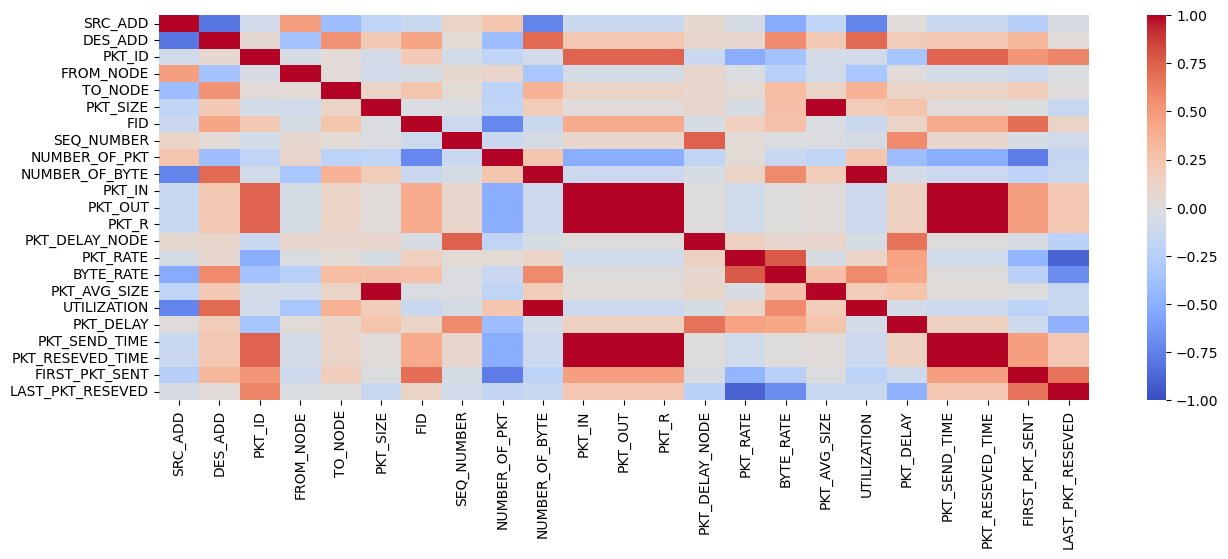

In [90]:
plt.figure(figsize=(15, 5))
sns.heatmap(numeric_columns.corr(), cmap="coolwarm", vmax=1.0, vmin=-1.0)
plt.show()

We will look into non-diagonal values and see that some time and byte size related varibales perfectly correlate. This is expected since these are different representation of time and size information about a network packet.

### Data Analysis (EDA)

Now that we've verified that data is clean, let's do some analysis to address our original question:

What are the characteristics of the packets that account for malicious network traffic?

We will divide our data into categorical and numeric and proceed in this way.

#### Univariate Analysis - Categorical¶

Let's look at the variable of interest again, 'PKT_CLASS':

In [91]:
# Check the distribution of normal vs. malicisous traffic
network_df['PKT_CLASS'].value_counts()/network_df.shape[0]*100.0

PKT_CLASS
Normal        89.600022
UDP-Flood      9.318600
Smurf          0.582690
SIDDOS         0.308469
HTTP-FLOOD     0.190219
Name: count, dtype: float64

We see above, there is about a 90/10 split in 'normal' and malicious traffic. ~9% of malicious traffic is 'UDP-Flood' and the 
rest marginally distributed between 'Smurf', 'SIDDOS' and 'HTTP-FLOOD'.

Let's take a look at the network traffic overall.

Split the data into categorical and numerical variables, and do some EDA for both types.



In [92]:
network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NUMBER_OF_BYTE    int64  
 12  NODE_NAME_FROM    object 
 13  NODE_NAME_TO      object 
 14  PKT_IN            float64
 15  PKT_OUT           float64
 16  PKT_R             float64
 17  PKT_DELAY_NODE    float64
 18  PKT_RATE          float64
 19  BYTE_RATE         float64
 20  PKT_AVG_SIZE      float64
 21  UTILIZATION       float64
 22  PKT_DELAY         float64
 23  PKT_SEND_TIME     float64
 24  PKT_RESEVED_TIME  float64
 25  FIRST_PKT_SENT    float64
 26  LAST_PKT_RESEV

In [93]:
# Make a new dataframe of only the categorical variables
categorical_df = network_df.select_dtypes('object').copy()

# Check
categorical_df.head()

,PKT_TYPE,FLAGS,NODE_NAME_FROM,NODE_NAME_TO,PKT_CLASS
0,tcp,-------,Switch1,Router,Normal
1,tcp,-------,Router,server1,Normal
2,ack,-------,Router,Switch2,UDP-Flood
3,ack,-------,Router,Switch1,Normal
4,ack,-------,Router,Switch1,Normal


In [94]:
categorical_df['NODE_NAME_TO'].value_counts()

NODE_NAME_TO
Router             641580
server1            445876
Switch1            385484
Switch2            256096
router              73013
switch1             40452
switch2             32556
clien-12            16103
clien-11            16103
clien-13            16103
clien-10            16103
clien-14            16103
clien-15            16092
clien-4             16091
clien-0             16091
clien-2             16091
clien-6             16091
clien-3             16091
clien-5             16091
clien-1             16091
clien-7             16090
clien-8             16088
clien-9             16085
webcache            14245
webserverlistin      5641
clienthttp           4734
http_client           563
client-10             140
client-6              140
client-8              140
client-14             140
client-11             140
client-5              140
client-2              140
client-18             140
client-16             140
client-7              140
client-12             140

In [95]:
categorical_df['NODE_NAME_FROM'].value_counts()

NODE_NAME_FROM
Router             641580
Switch1            385484
server1            260428
Switch2            256096
router              73004
switch1             40447
switch2             32556
clien-11            22353
clien-13            22353
clien-14            22353
clien-10            22353
clien-12            22353
clien-15            22342
clien-1             22341
clien-5             22341
clien-2             22341
clien-0             22341
clien-6             22341
clien-3             22341
clien-4             22341
clien-7             22340
clien-8             22338
clien-9             22335
webserverlistin     11264
webcache            10948
clien-17             6299
clien-19             6298
clien-16             6297
clien-18             6297
client-4             3490
client-6             3336
client-7             3336
client-14            3176
client-19            3176
client-9             3176
client-11            3176
client-13            3176
client-8             31

There are node names with `clien` and `client`, supposedly they are referring to the same hostname. To check that, we will compare their IDs.

In [39]:
clien_p="clien-" # the pattern of hostnames starting with 'clien-'
client_p="client-" # the pattern of hostnames starting with 'client-'

In [96]:

# the code below compares node ids of hostnames starting with either 'clien' or 'client'
# e.g.: node id of hostnames 'clien-0' and 'client-0' compared. For both cases, node id is 0 as it can be seen from the console output printed below.

for i in range (20):
    
    temp_str_1=clien_p+str(i)
    temp_str_2=client_p+str(i)
    
    filter_1 = (network_df['NODE_NAME_TO']==temp_str_1)
    filter_2 = (network_df['NODE_NAME_TO']==temp_str_2)
    
    a=network_df[filter_1]['TO_NODE'].value_counts()
    b=network_df[filter_2]['TO_NODE'].value_counts()

    print(f"The node ID of clien-{i} hostname is {a.index[0]}", f"The node ID of client-{i} hostname is {b.index[0]}")

The node ID of clien-0 hostname is 0 The node ID of client-0 hostname is 0
The node ID of clien-1 hostname is 1 The node ID of client-1 hostname is 1
The node ID of clien-2 hostname is 2 The node ID of client-2 hostname is 2
The node ID of clien-3 hostname is 3 The node ID of client-3 hostname is 3
The node ID of clien-4 hostname is 4 The node ID of client-4 hostname is 4
The node ID of clien-5 hostname is 5 The node ID of client-5 hostname is 5
The node ID of clien-6 hostname is 6 The node ID of client-6 hostname is 6
The node ID of clien-7 hostname is 7 The node ID of client-7 hostname is 7
The node ID of clien-8 hostname is 8 The node ID of client-8 hostname is 8
The node ID of clien-9 hostname is 9 The node ID of client-9 hostname is 9
The node ID of clien-10 hostname is 10 The node ID of client-10 hostname is 10
The node ID of clien-11 hostname is 11 The node ID of client-11 hostname is 11
The node ID of clien-12 hostname is 12 The node ID of client-12 hostname is 12
The node ID o

For all 20 hostnames, clien and client names correspond to the same node ID. So, we can change `clien` to `client`

In [97]:
# Replace "clien" with "client" in the 'column_name' column
categorical_df['NODE_NAME_TO'] = categorical_df['NODE_NAME_TO'].str.replace('clien-', 'client-')
categorical_df['NODE_NAME_FROM'] = categorical_df['NODE_NAME_FROM'].str.replace('clien-', 'client-')

In [98]:
categorical_df['NODE_NAME_TO'].value_counts()

NODE_NAME_TO
Router             641580
server1            445876
Switch1            385484
Switch2            256096
router              73013
switch1             40452
switch2             32556
client-12           16243
client-10           16243
client-11           16243
client-13           16243
client-14           16243
client-15           16232
client-2            16231
client-4            16231
client-6            16231
client-3            16231
client-5            16231
client-1            16231
client-7            16230
client-8            16228
client-9            16225
client-0            16161
webcache            14245
webserverlistin      5641
clienthttp           4734
http_client           563
client-17             189
client-19             188
client-18             187
client-16             187
Name: count, dtype: int64

In [99]:
categorical_df['NODE_NAME_FROM'].value_counts()

NODE_NAME_FROM
Router             641580
Switch1            385484
server1            260428
Switch2            256096
router              73004
switch1             40447
switch2             32556
client-4            25831
client-6            25677
client-7            25676
client-14           25529
client-11           25529
client-13           25529
client-1            25517
client-5            25517
client-8            25514
client-9            25511
client-0            25447
client-10           25378
client-12           25378
client-15           25367
client-3            25366
client-2            25366
webserverlistin     11264
webcache            10948
client-17            9475
client-19            9474
client-16            9473
client-18            9322
clienthttp           2364
http_client           621
Name: count, dtype: int64

The values were merged correctly.

There are also other potential data entry issues like `Switch1 - switch1`, `clienthttp-http_client`, `Switch2 - switch2`, `Router-router`
Let's check them up by comparing their node IDs.

In [100]:
filter_1 = (network_df['NODE_NAME_TO']=="Switch1")
filter_2 = (network_df['NODE_NAME_TO']=="switch1")

In [101]:
    a=network_df[filter_1]['TO_NODE'].value_counts()
    b=network_df[filter_2]['TO_NODE'].value_counts()

In [102]:
  print(f"The node ID of Switch1 hostname is {a.index[0]}", f"The node ID of switch1 hostname is {b.index[0]}")

The node ID of Switch1 hostname is 21 The node ID of switch1 hostname is 21


In [103]:
filter_1 = (network_df['NODE_NAME_TO']=="clienthttp")
filter_2 = (network_df['NODE_NAME_TO']=="http_client")

In [104]:
    a=network_df[filter_1]['TO_NODE'].value_counts()
    b=network_df[filter_2]['TO_NODE'].value_counts()

In [105]:
  print(f"The node ID of clienthttp hostname is {a.index[0]}", f"The node ID of http_client hostname is {b.index[0]}")

The node ID of clienthttp hostname is 20 The node ID of http_client hostname is 20


In [106]:
filter_1 = (network_df['NODE_NAME_TO']=="Switch2")
filter_2 = (network_df['NODE_NAME_TO']=="switch2")

In [107]:
 a=network_df[filter_1]['TO_NODE'].value_counts()
 b=network_df[filter_2]['TO_NODE'].value_counts()

In [108]:
  print(f"The node ID of Switch2 hostname is {a.index[0]}", f"The node ID of switch2 hostname is {b.index[0]}")

The node ID of Switch2 hostname is 22 The node ID of switch2 hostname is 22


In [109]:
filter_1 = (network_df['NODE_NAME_TO']=="Router")
filter_2 = (network_df['NODE_NAME_TO']=="router")

In [110]:
  a=network_df[filter_1]['TO_NODE'].value_counts()
  b=network_df[filter_2]['TO_NODE'].value_counts()

In [111]:
 print(f"The node ID of clienthttp hostname is {a.index[0]}", f"The node ID of http_client hostname is {b.index[0]}")

The node ID of clienthttp hostname is 23 The node ID of http_client hostname is 23


All 4 pair have the same node id, so they can be combined

In [112]:
categorical_df['NODE_NAME_TO'] = categorical_df['NODE_NAME_TO'].str.replace('Switch1', 'switch1')
categorical_df['NODE_NAME_FROM'] = categorical_df['NODE_NAME_FROM'].str.replace('Switch1', 'switch1')

In [113]:
categorical_df['NODE_NAME_TO'] = categorical_df['NODE_NAME_TO'].str.replace('Switch2', 'switch2')
categorical_df['NODE_NAME_FROM'] = categorical_df['NODE_NAME_FROM'].str.replace('Switch2', 'switch2')

In [114]:
categorical_df['NODE_NAME_TO'] = categorical_df['NODE_NAME_TO'].str.replace('clienthttp', 'http_client')
categorical_df['NODE_NAME_FROM'] = categorical_df['NODE_NAME_FROM'].str.replace('clienthttp', 'http_client')

In [115]:
categorical_df['NODE_NAME_TO'] = categorical_df['NODE_NAME_TO'].str.replace('Router', 'router')
categorical_df['NODE_NAME_FROM'] = categorical_df['NODE_NAME_FROM'].str.replace('Router', 'router')

In [116]:
#sanity check
categorical_df['NODE_NAME_TO'].value_counts()

NODE_NAME_TO
router             714593
server1            445876
switch1            425936
switch2            288652
client-12           16243
client-10           16243
client-11           16243
client-13           16243
client-14           16243
client-15           16232
client-6            16231
client-2            16231
client-4            16231
client-3            16231
client-5            16231
client-1            16231
client-7            16230
client-8            16228
client-9            16225
client-0            16161
webcache            14245
webserverlistin      5641
http_client          5297
client-17             189
client-19             188
client-18             187
client-16             187
Name: count, dtype: int64

In [117]:
categorical_df['NODE_NAME_FROM'].value_counts()

NODE_NAME_FROM
router             714584
switch1            425931
switch2            288652
server1            260428
client-4            25831
client-6            25677
client-7            25676
client-14           25529
client-11           25529
client-13           25529
client-5            25517
client-1            25517
client-8            25514
client-9            25511
client-0            25447
client-12           25378
client-10           25378
client-15           25367
client-3            25366
client-2            25366
webserverlistin     11264
webcache            10948
client-17            9475
client-19            9474
client-16            9473
client-18            9322
http_client          2985
Name: count, dtype: int64

Now we can review distibution of categorical data.

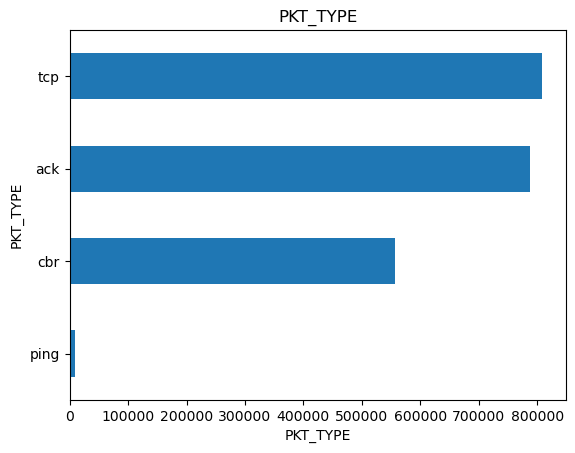

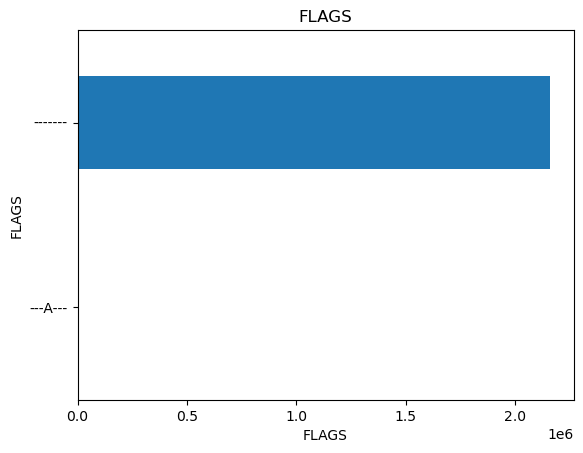

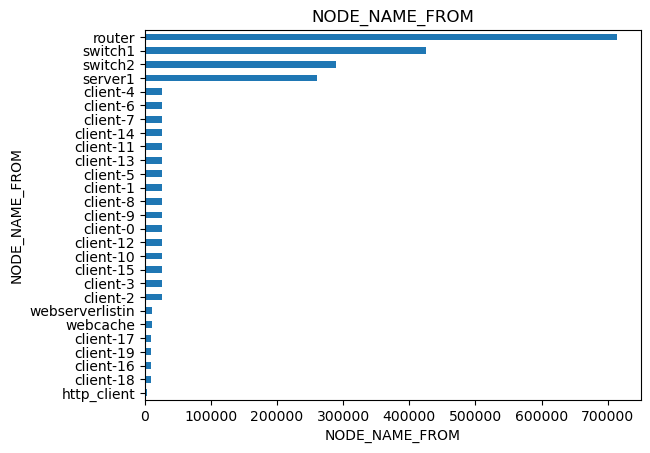

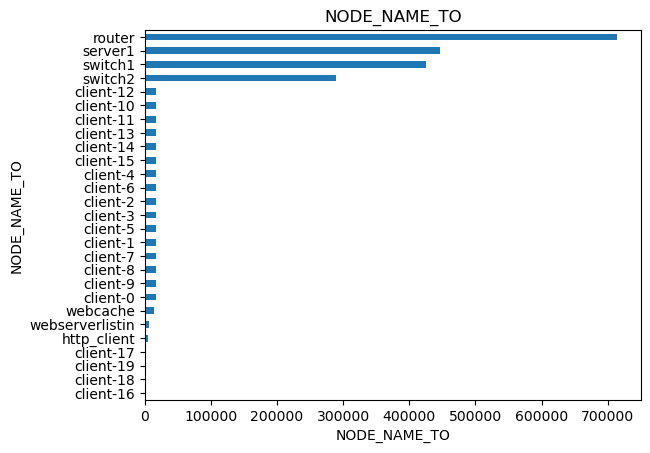

In [62]:
# Iterate over the columns
for column in categorical_df.columns[:-1]:

    # Visualize a summary of each
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.xlabel(column)
    plt.title(column)
    plt.show()

We can see that:

- Most of the pkt_type are `tcp` and `ack`.
- FLAGS don't hold much information.
- The majority of network traffic goes through the router and 2 swithces.
- There is only one server and 20 clients

### Univariate Analysis - Numeric variables

Let's repeat the process we did above with the numeric variables:

In [119]:
network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NUMBER_OF_BYTE    int64  
 12  NODE_NAME_FROM    object 
 13  NODE_NAME_TO      object 
 14  PKT_IN            float64
 15  PKT_OUT           float64
 16  PKT_R             float64
 17  PKT_DELAY_NODE    float64
 18  PKT_RATE          float64
 19  BYTE_RATE         float64
 20  PKT_AVG_SIZE      float64
 21  UTILIZATION       float64
 22  PKT_DELAY         float64
 23  PKT_SEND_TIME     float64
 24  PKT_RESEVED_TIME  float64
 25  FIRST_PKT_SENT    float64
 26  LAST_PKT_RESEV

In [120]:
# Get only the numeric columns
numeric_df = network_df.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,...,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
0,3.00,24.30,389693,21,23,1540,4,11339,16091,24780100,...,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920
1,15.00,24.15,201196,23,24,1540,16,6274,16092,24781700,...,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211
2,24.15,15.00,61905,23,22,55,16,1930,16092,885060,...,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221
3,24.90,9.00,443135,23,21,55,10,12670,16085,884675,...,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098
4,24.80,8.00,157335,23,21,55,9,4901,16088,884840,...,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864


In [121]:
network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NUMBER_OF_BYTE    int64  
 12  NODE_NAME_FROM    object 
 13  NODE_NAME_TO      object 
 14  PKT_IN            float64
 15  PKT_OUT           float64
 16  PKT_R             float64
 17  PKT_DELAY_NODE    float64
 18  PKT_RATE          float64
 19  BYTE_RATE         float64
 20  PKT_AVG_SIZE      float64
 21  UTILIZATION       float64
 22  PKT_DELAY         float64
 23  PKT_SEND_TIME     float64
 24  PKT_RESEVED_TIME  float64
 25  FIRST_PKT_SENT    float64
 26  LAST_PKT_RESEV

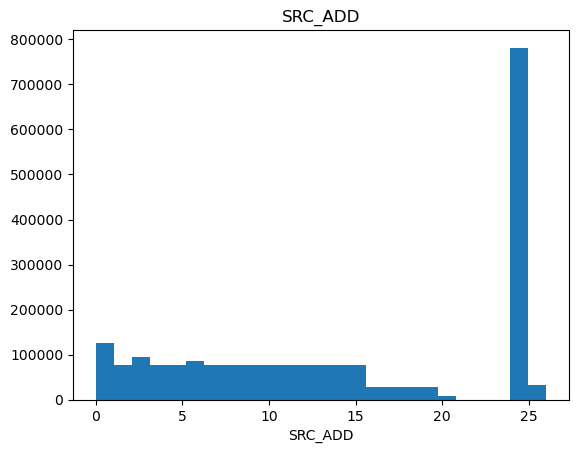

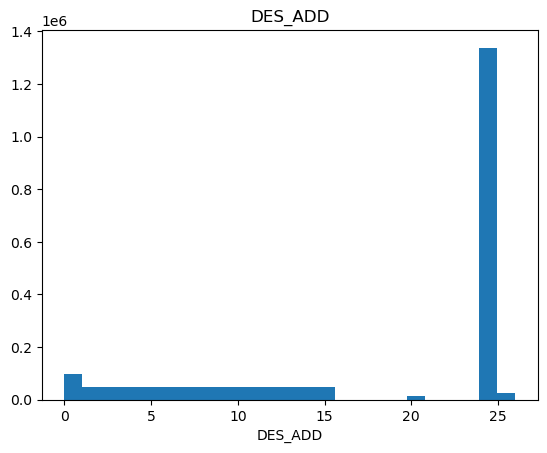

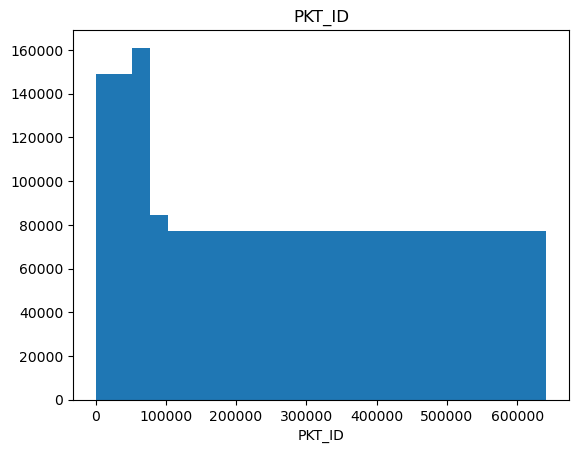

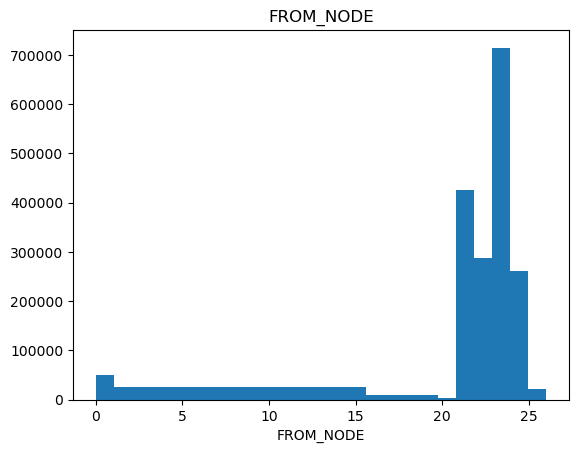

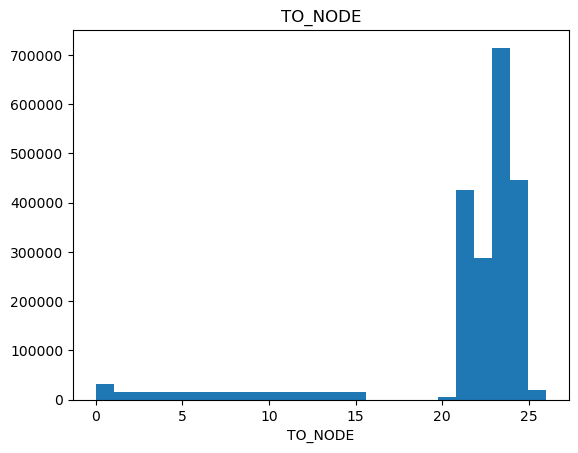

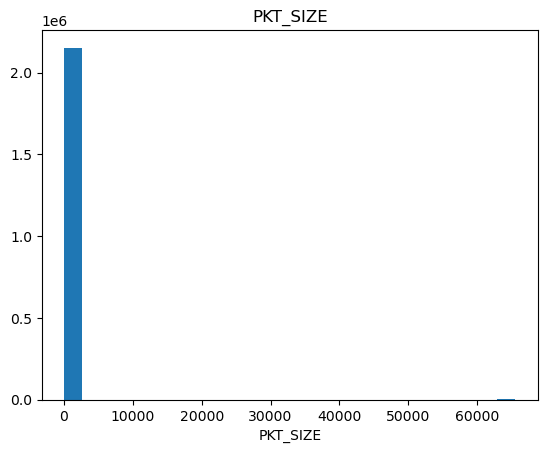

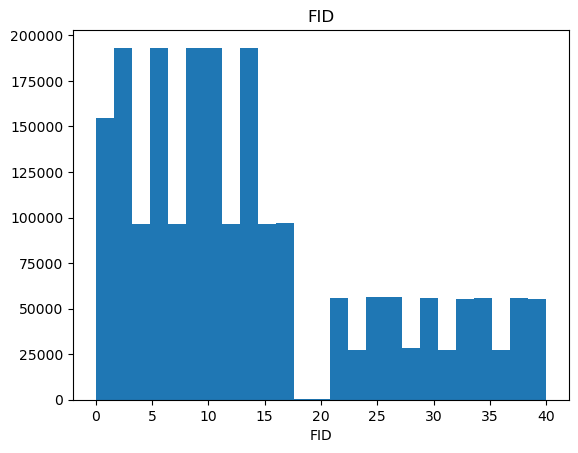

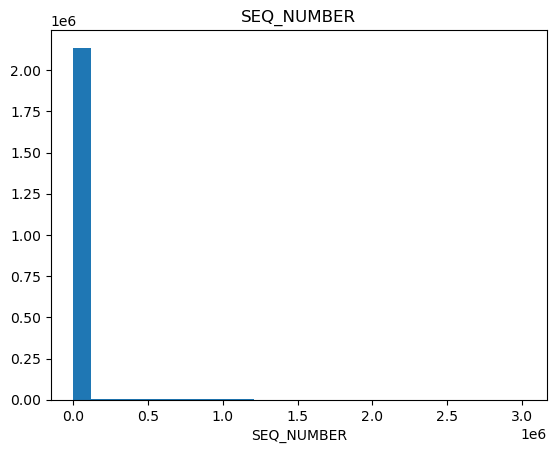

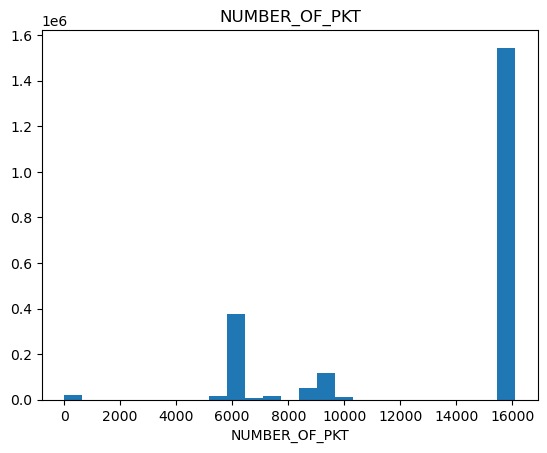

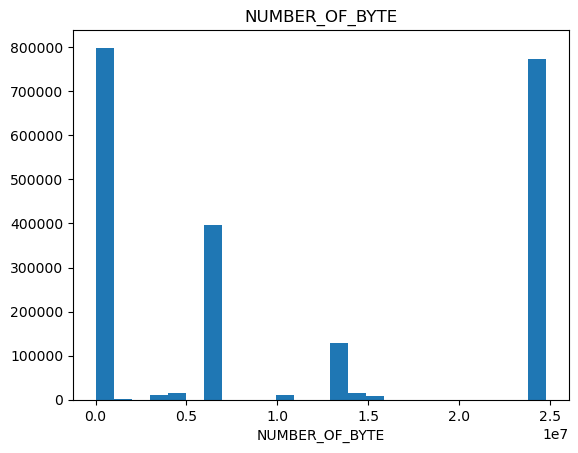

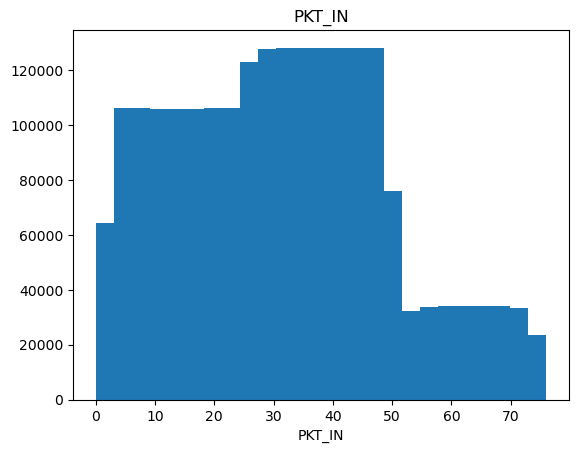

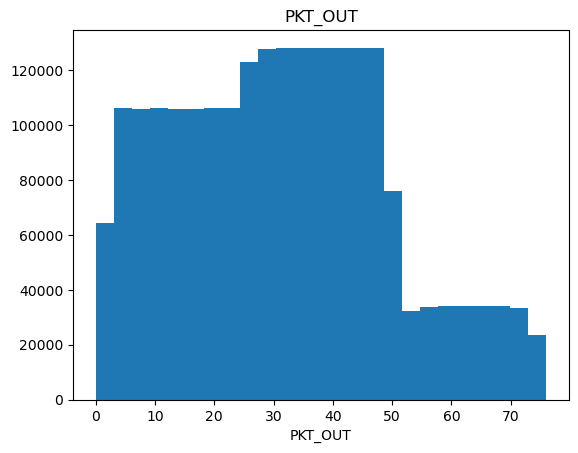

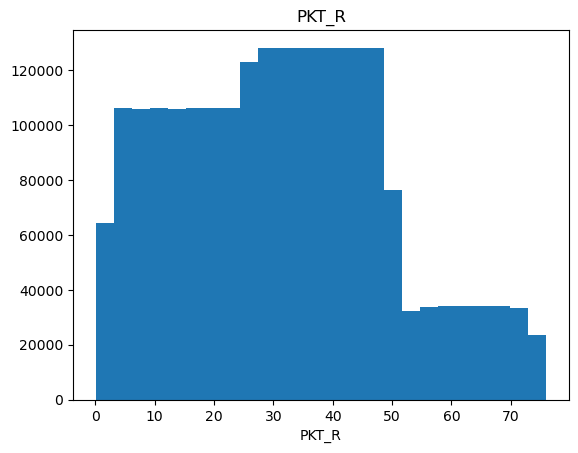

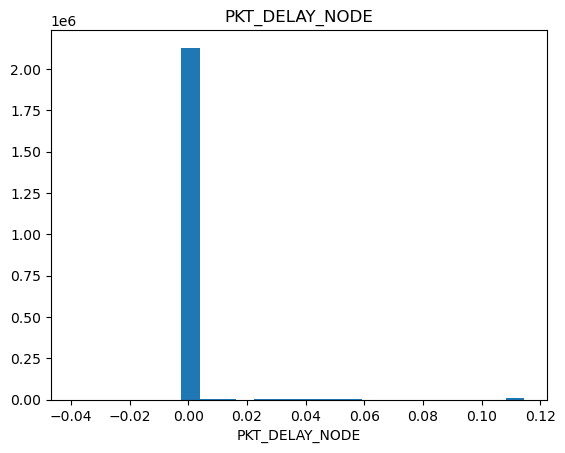

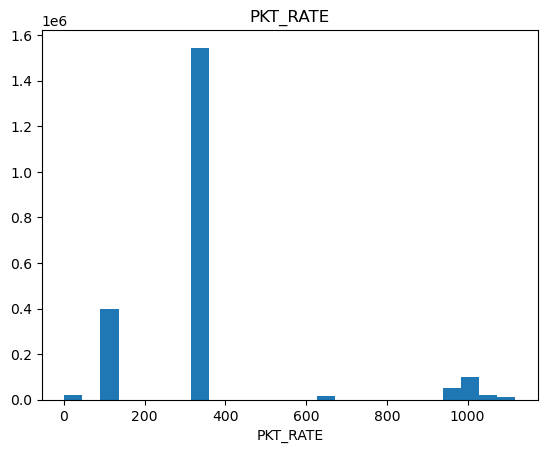

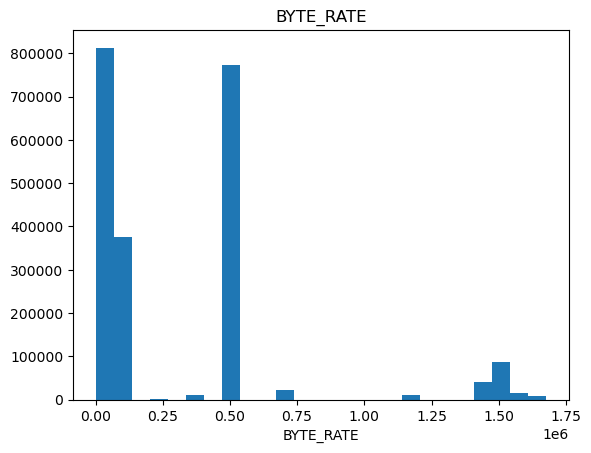

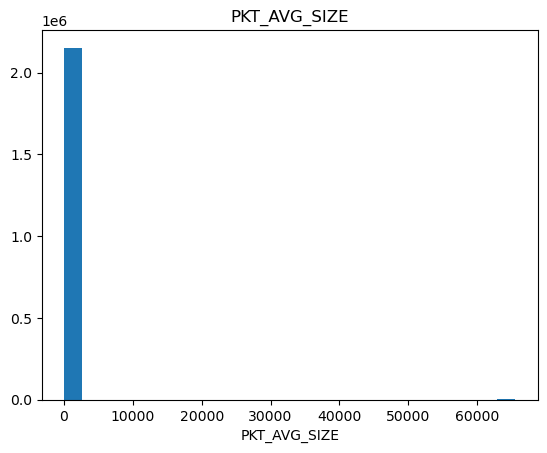

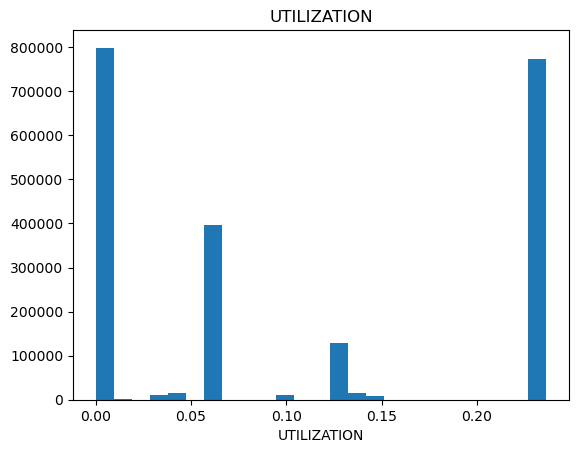

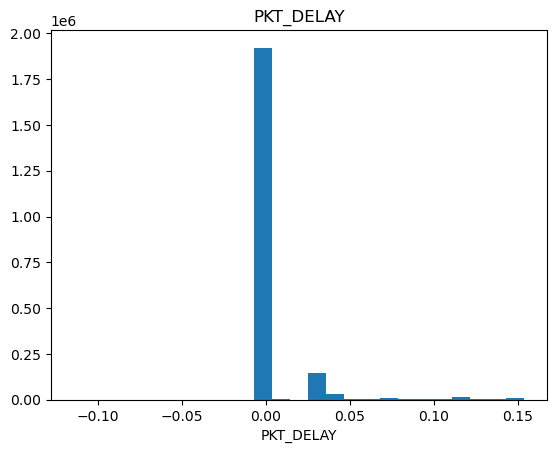

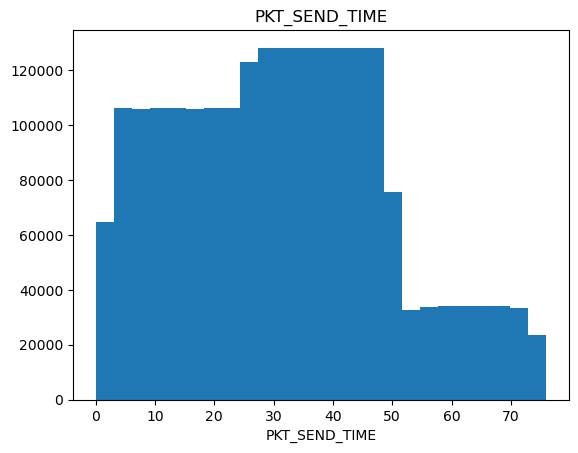

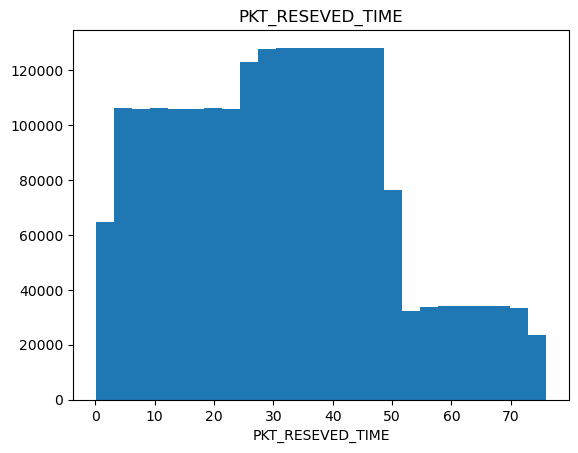

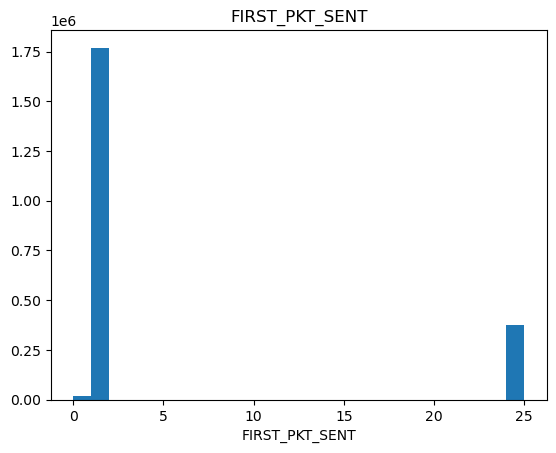

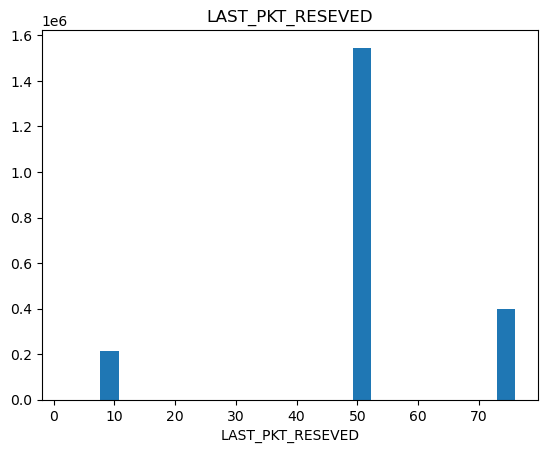

In [122]:
for column in numeric_df:
    plt.figure()
    plt.hist(numeric_df[column], bins=25)
    plt.title(column)
    plt.xlabel(column)
    plt.show()

* No normal distribution across all numeric variables
* By rates are close to 0 and 0.5
* Travel time to and from node are similar among all packets
* Packet size are relatively the same across the records

### Bivariate - with respect to `pkt_class` variable.

In [123]:
# Groupby
network_df.groupby('PKT_CLASS').mean(numeric_only=True)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,...,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
PKT_CLASS,,,,,,,,,,,,,,,,,,,,,
HTTP-FLOOD,10.530900,24.320903,37674.932603,18.365937,22.847202,31412.905596,0.000000,1.408759,578.004866,6.616950e+06,...,0.014987,26.928764,7.256823e+05,31412.905596,0.063104,0.091904,36.130603,36.222507,0.064301,12.674448
Normal,14.907160,17.616238,315193.871288,19.738564,20.627485,827.769129,12.525547,20293.422934,13953.603895,1.133673e+07,...,0.000806,288.520687,2.324569e+05,827.767218,0.108115,0.002201,30.598447,30.630324,5.594551,54.521992
SIDDOS,19.695052,24.652915,81005.515829,21.241260,22.913578,100.236459,0.674119,835.695124,7449.205551,1.037644e+06,...,0.000297,104.976245,1.859594e+04,100.236459,0.009896,0.068330,63.100237,63.170135,1.436532,74.877048
Smurf,13.654500,19.891608,215931.061795,19.327403,21.372121,21420.942097,8.013582,21169.259651,9231.683638,1.157614e+07,...,0.005981,197.478455,6.307281e+05,21421.001580,0.110399,0.034445,33.040375,33.093795,3.653447,40.378111
UDP-Flood,10.159883,23.837055,67396.131223,18.145820,22.609291,1318.643193,28.693748,2684.934306,9569.803883,1.234088e+07,...,0.002646,940.048809,1.271845e+06,1318.643193,0.117692,0.035229,37.227930,37.266134,1.469260,14.423046


The initial thoughts about numeric features:
- `PKT_SIZE`. Malicious traiffc have higher packet size.
- Flow ID, source and destination address are formal tags given and don't hold much value.
- Normal traffic has higher `number of packet`.
- Number of bytes are similar
- `PKT_DELAY_NODE`. Normal traffic has lower delay, i.e. raches the destination node faster than malisious traffic.
- Malicous traffic had higher `packet rate`, meaning more packets are sent per unit of time.
- `Byte_rate`. Byte rate, is also higher at malicious traffic.
- `Average size of the packet` is lower at normal traffic.
- Not much difference in network utilization.
- `PKT_DELAY`. Total travel time from source to desitnation of normal network is considerably lower than malicious traffic.
- Packet sent and received times were used to calcualte delay, but don't hold much information on their own.

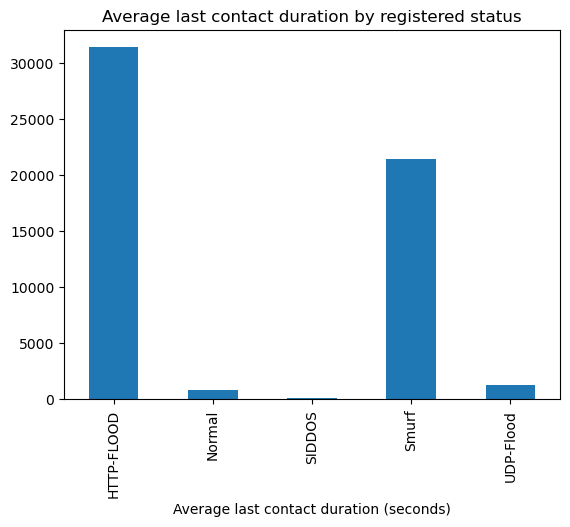

In [69]:
network_df.groupby('PKT_CLASS')['PKT_SIZE'].mean().plot(kind='bar')
plt.xlabel('Average last contact duration (seconds)')
plt.title('Average last contact duration by registered status')
plt.show()

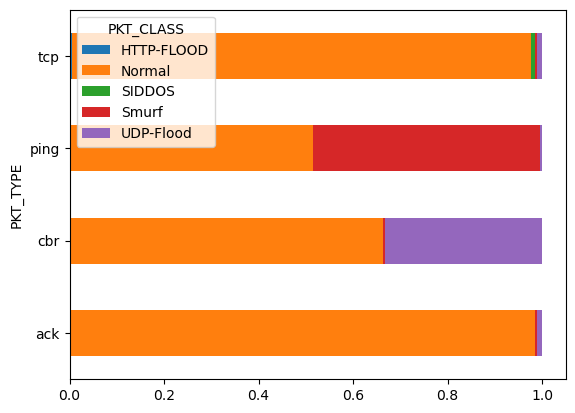

In [70]:
pct_registered_df = network_df.groupby(['PKT_TYPE', 'PKT_CLASS'])['PKT_TYPE'].count()/network_df.groupby('PKT_TYPE')['PKT_TYPE'].count()

pct_registered_df.unstack().plot(kind='barh', stacked=True)
plt.show()

Third of cbr and half of ping packets are used for the malicious traffic

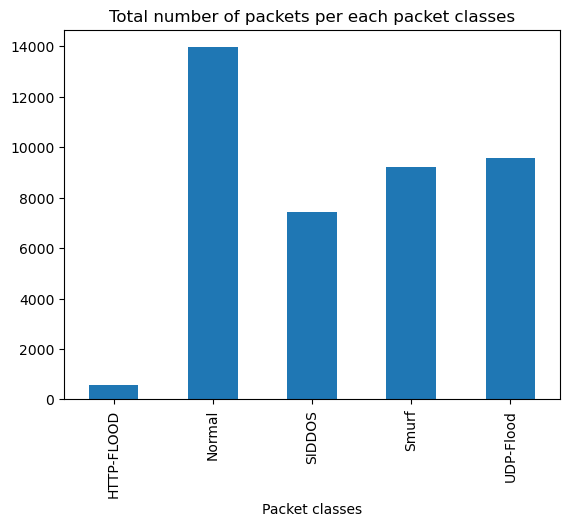

In [126]:
network_df.groupby('PKT_CLASS')['NUMBER_OF_PKT'].mean().plot(kind='bar')
plt.xlabel('Packet classes')
plt.title('Total number of packets per each packet classes')
plt.show()

In [127]:
categorical_df.columns

Index(['PKT_TYPE', 'FLAGS', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_CLASS'], dtype='object')

In [128]:
categorical_df.iloc[:, :-1]

,PKT_TYPE,FLAGS,NODE_NAME_FROM,NODE_NAME_TO
0,tcp,-------,switch1,router
1,tcp,-------,router,server1
2,ack,-------,router,switch2
3,ack,-------,router,switch1
4,ack,-------,router,switch1
...,...,...,...,...
2160663,ack,-------,switch2,client-10
2160664,ack,-------,router,switch2
2160665,tcp,-------,switch1,router
2160666,tcp,-------,client-5,switch1


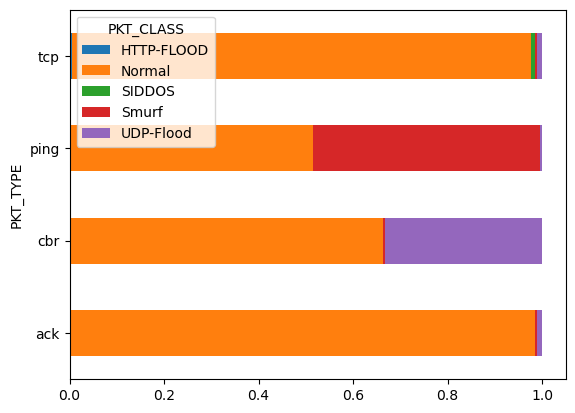

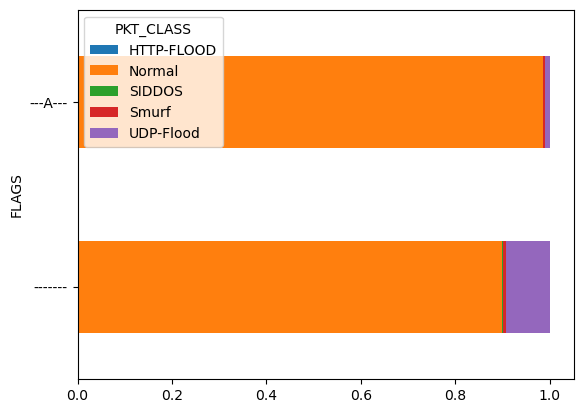

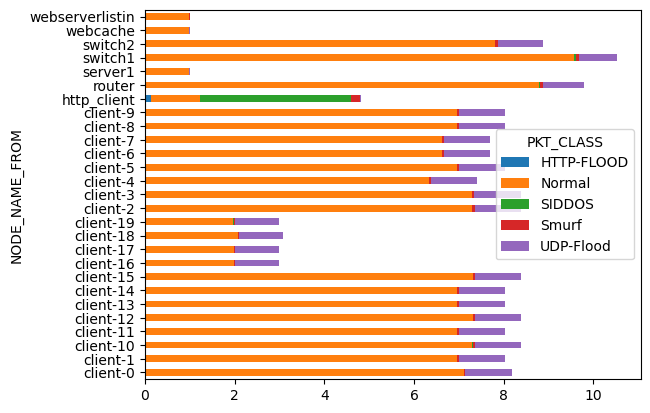

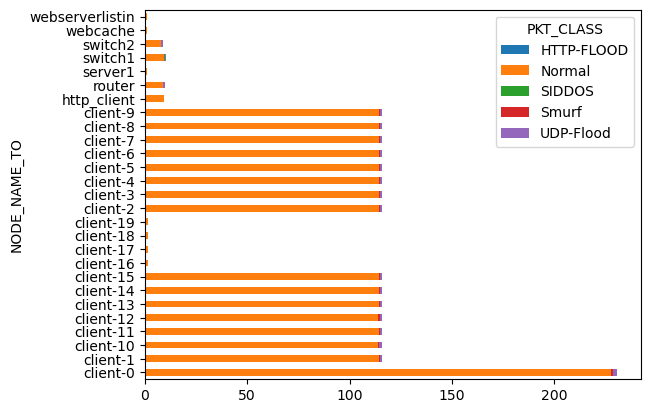

In [130]:
# Iterate over each categorical column except the last (PCT_CLASS)
for column in categorical_df.iloc[:, :-1]:

    pct_network_df = categorical_df.groupby([column, 'PKT_CLASS'])[column].count()/network_df.groupby(column)[column].count()

    pct_network_df.unstack().plot(kind='barh', stacked=True)
    plt.show()

* `Ping` and `cbr` packet types were used more for malicous attack.
* All client machines equally contributed on `UDP-flood` attack
* Most of the packets originated from HTTP_clinet node were used for `SIDDOS` attack
* Client 16, 17, 18, and 19 sent and received less packets than other clients

### Bivariate Analysis - Numeric Features

Now we will repeat the process for numeric variables.

In [132]:
numeric_df

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,...,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
0,3.00,24.30,389693,21,23,1540,4,11339,16091,24780100,...,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920
1,15.00,24.15,201196,23,24,1540,16,6274,16092,24781700,...,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211
2,24.15,15.00,61905,23,22,55,16,1930,16092,885060,...,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221
3,24.90,9.00,443135,23,21,55,10,12670,16085,884675,...,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098
4,24.80,8.00,157335,23,21,55,9,4901,16088,884840,...,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,24.10,10.00,43184,22,10,55,11,1343,16103,885665,...,0.0,328.561918,18070.9,55.0,0.008446,0.0,5.275034,5.305043,1.030013,50.040562
2160664,24.12,12.00,376386,23,22,55,13,10991,16103,885665,...,0.0,328.491596,18067.0,55.0,0.008446,0.0,34.498646,34.528655,1.030026,50.051067
2160665,1.00,24.10,140121,21,23,1540,2,4374,16091,24780100,...,0.0,328.297855,505578.0,1540.0,0.236321,0.0,14.407888,14.438258,1.000000,50.013418
2160666,5.00,24.50,26800,5,21,1540,6,832,16091,24780100,...,0.0,328.204637,505434.0,1540.0,0.236321,0.0,3.732227,3.762597,1.000000,50.027339


In [133]:
# We need the "registered" variable so we will add it back to our numeric dataframe
numeric_df['PKT_CLASS'] = network_df['PKT_CLASS']

# Check
numeric_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,1540,4,11339,16091,24780100,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,1540,16,6274,16092,24781700,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,55,16,1930,16092,885060,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,55,10,12670,16085,884675,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,55,9,4901,16088,884840,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,Normal


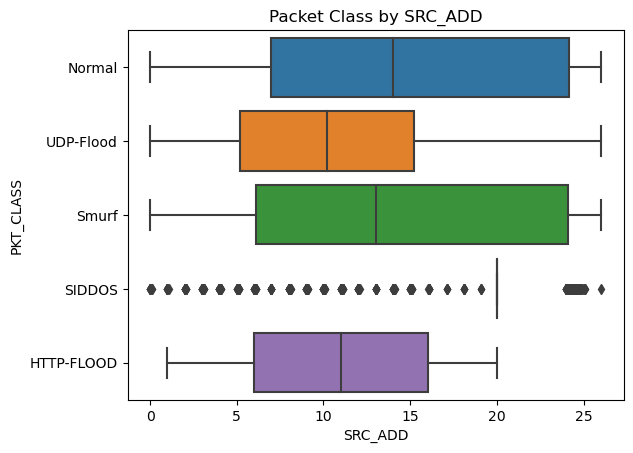

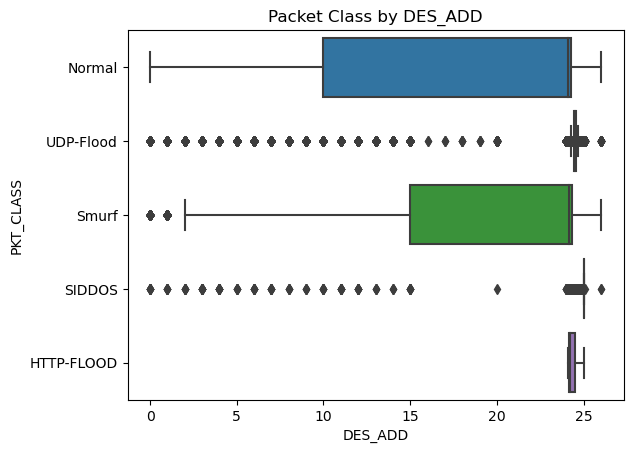

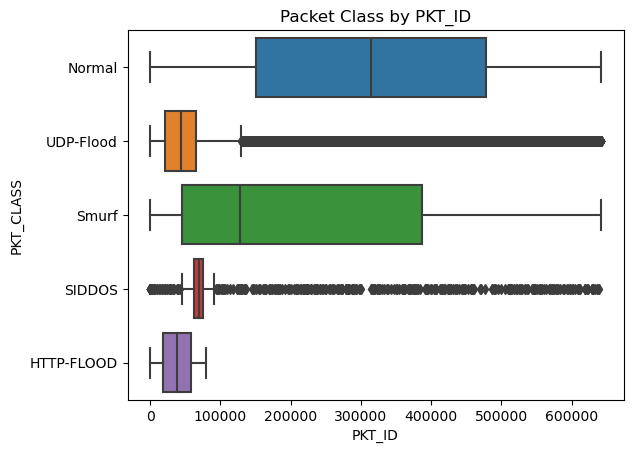

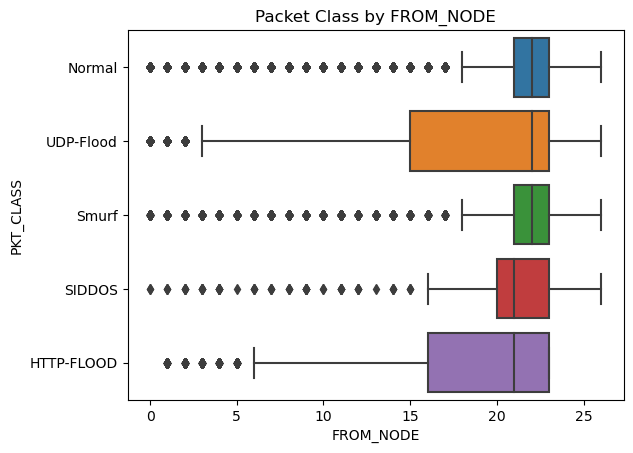

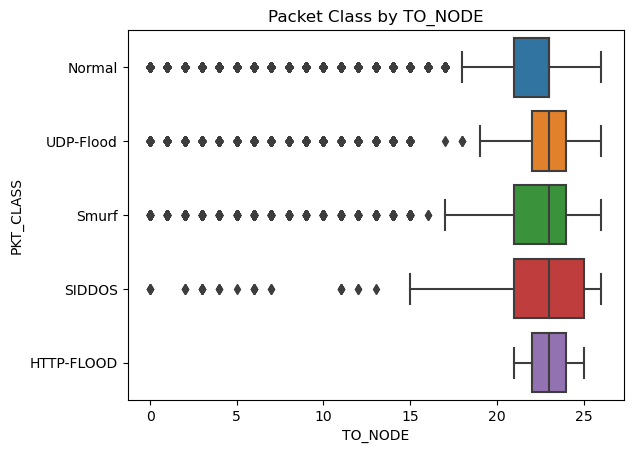

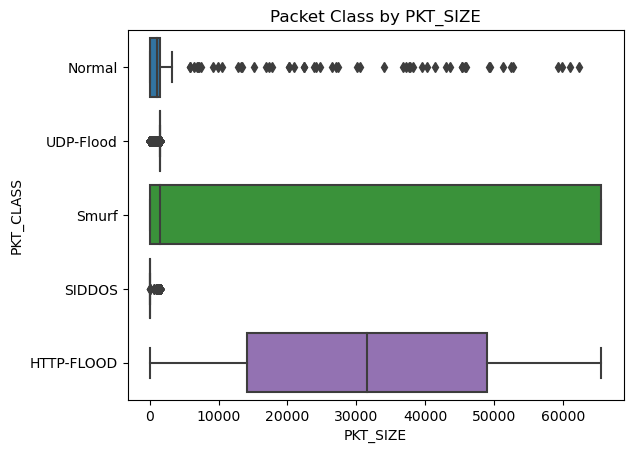

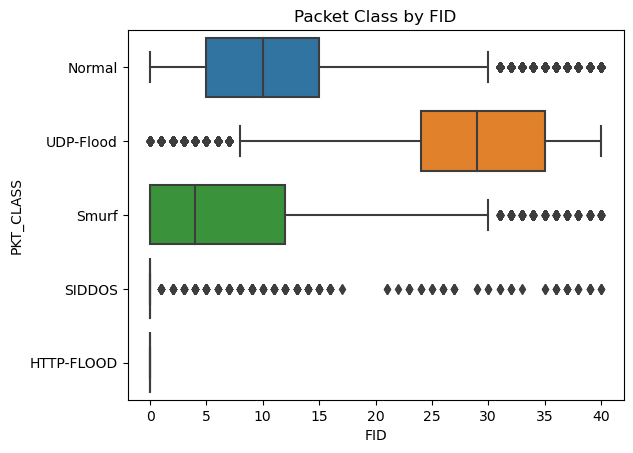

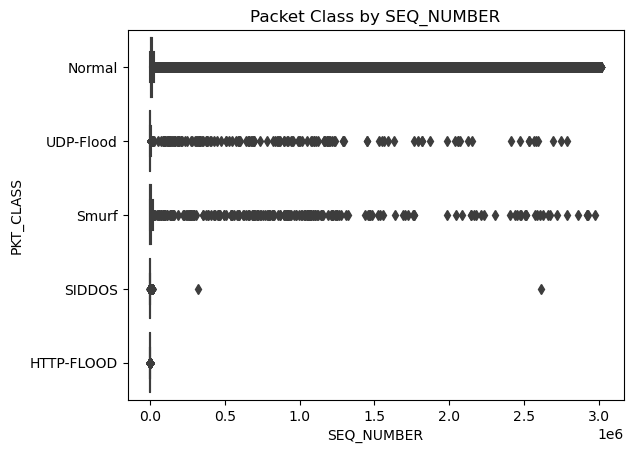

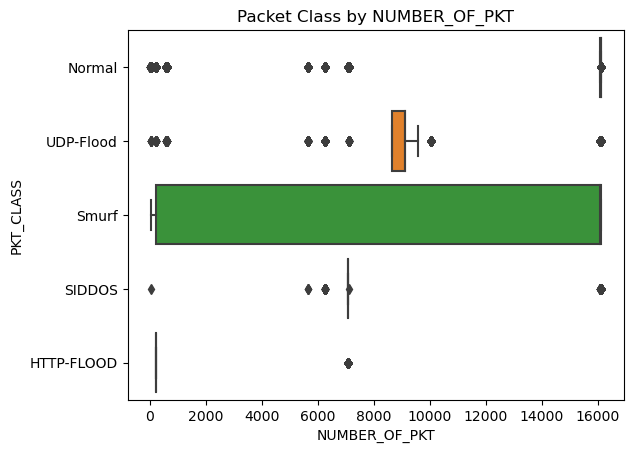

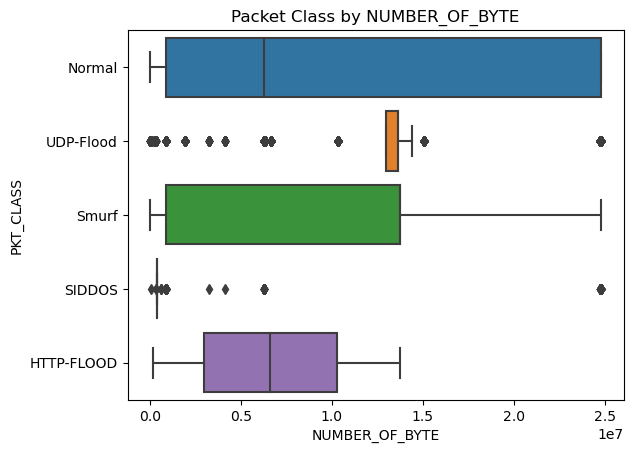

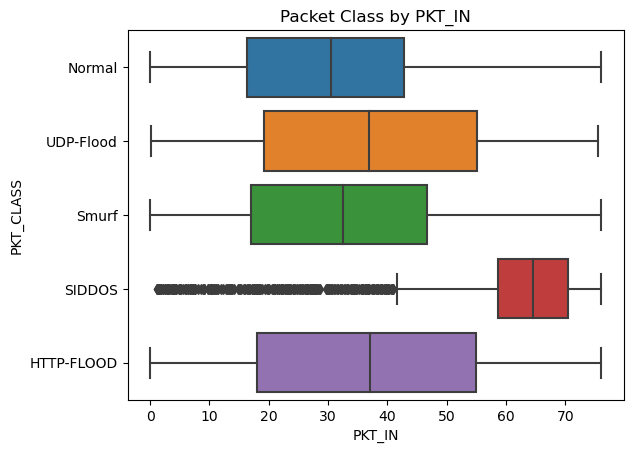

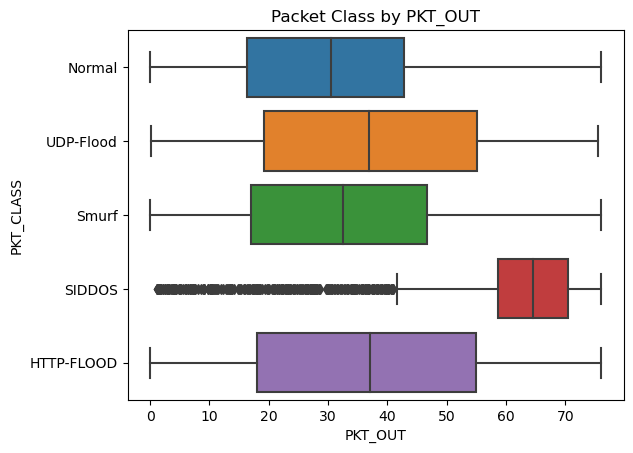

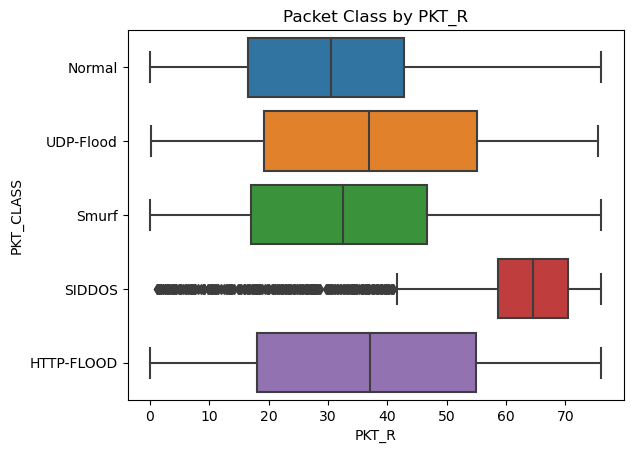

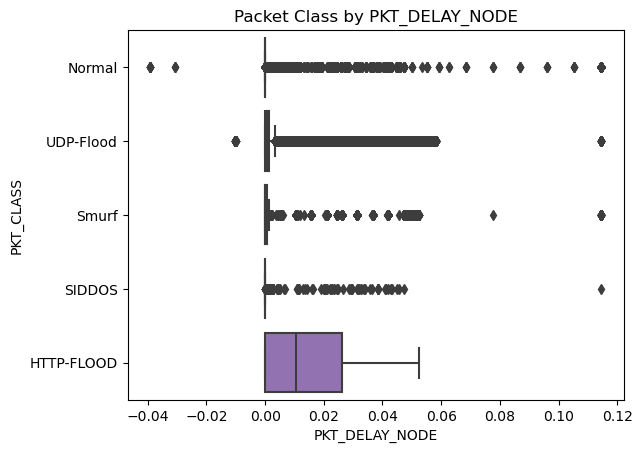

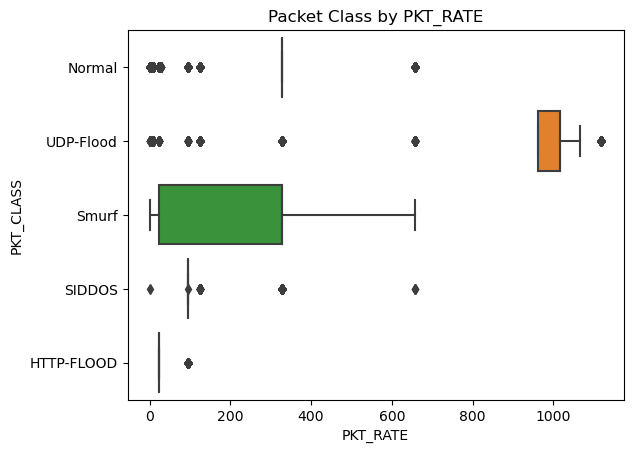

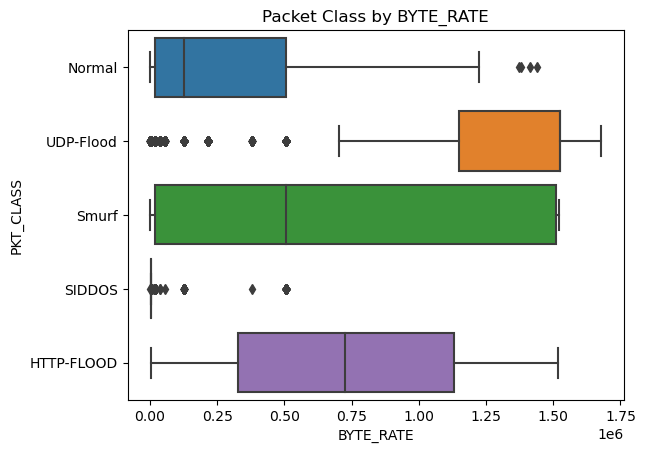

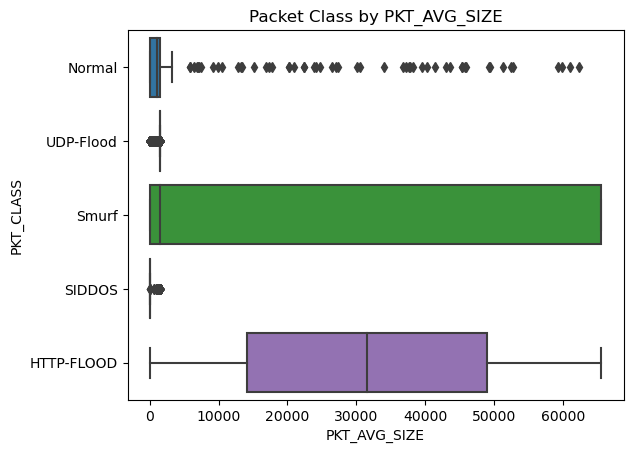

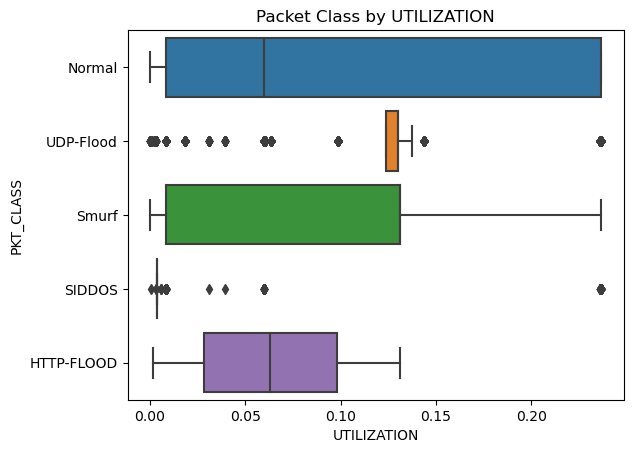

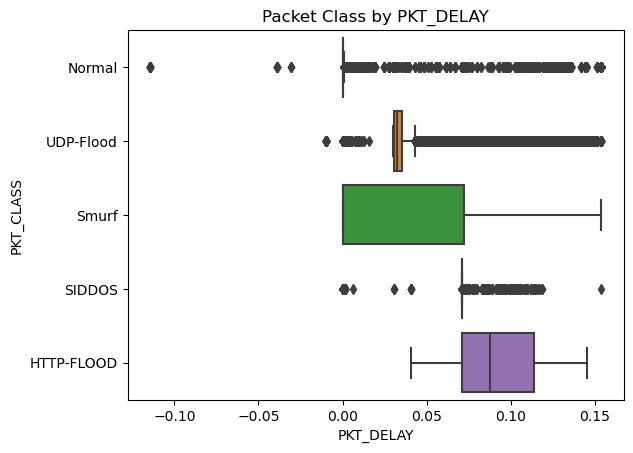

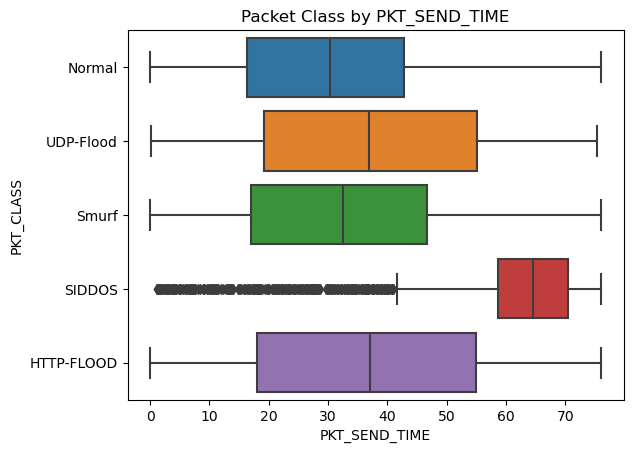

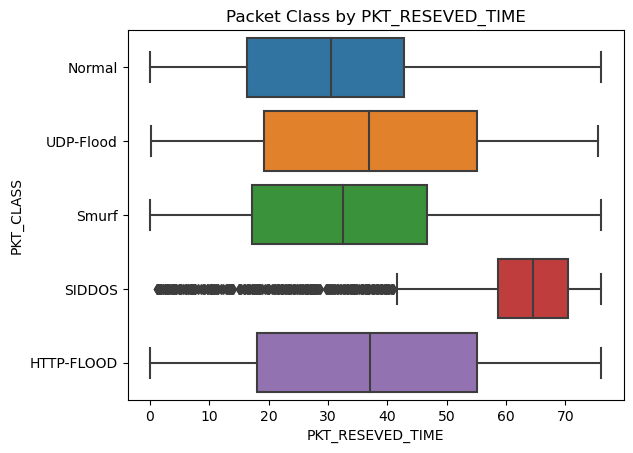

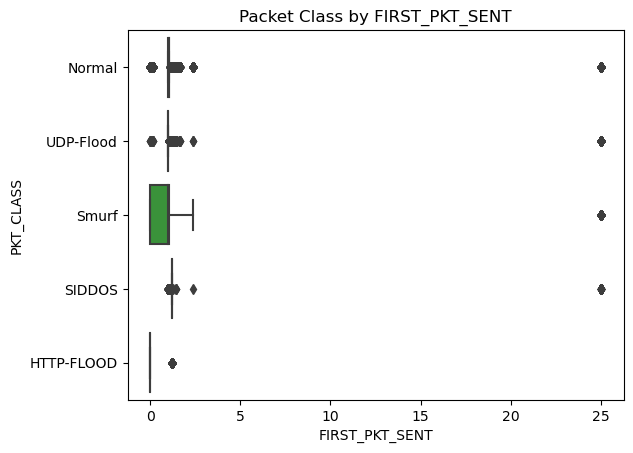

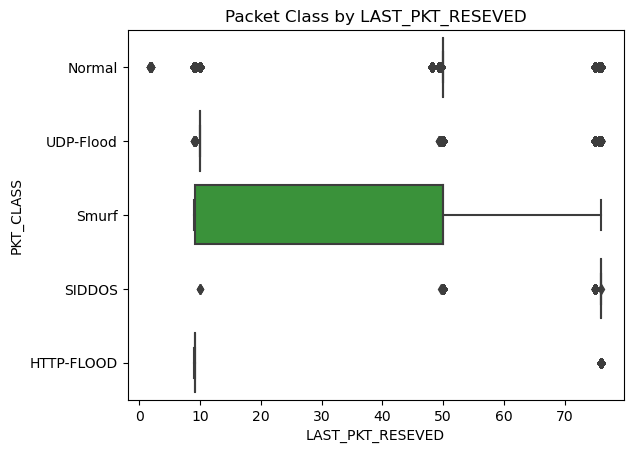

In [135]:
for col in numeric_df.iloc[:, :-1]:

    # Normalize the histogram by passing in 'stat=density' to account for differences in
    # counts by class.
    sns.boxplot(x=col, y='PKT_CLASS', data=network_df)
    plt.title(f'Packet Class by {col}')
    plt.show()

* UDP-Flood and HTTP-FLOOD packet came from wider range of nodes rather than other packet classes
* SMURF and HTTP-FLOOD packets have greater size than other pakcket classes
* SMURF class had greater variaty of pack average size, number of packets and byte rate
* Normal traffic had utlizized network more than other traffics.


### Summary 

From our initial analysis let's summarize what we have found out:

* Only 10% of data is of target value. We might need to merge all attack classes into one to get more balanced dataset.
* Data is relatively clean.
* Some key fields like IP, timestamps have been anonymized due to sensitivity.
* Ping and cbr packets were used more than other types of packets for network attack purposes. Adversaries were using less or not loaded packets to conduct attack. So, that has been done to evade security solutions like Anti-virus and firewall which examine payload.
* There is no any particular node that initiated network attack most. All client relativelly equally generated malicious traffic.